# Assignment 5 - Risk 

Write a program called *assignment_5_risk* (.py or .ipynb). The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result. One battle round is one shake of the attacker and defender dice.

**Rules of Risk**
In Risk one army fights another (using 6 sided dice). 

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:
1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
    - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
    - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


**Table 1:** Example of Risk
| Attacker rolls      | Defender Rolls| Attacker Loses     | Defender Losses | Explanation | 
| :----:                |    :----:     |         :---:     | :----:          | :----:       |
| 6, 4, 1             | 5, 3          | 0                  |      2          |         6 beats 5 and 4 beats 3 (the one is ignored as the lowest)   |
| 6, 6, 6  | 6, 3   | 1   | 1|  Defenders 6 beats the attackers first 6 and the attackers second 6 beats the defenders 3  |
| 5, 4, 4 | 5, 4 | 2 |0 | The defenders 5 beat the attackers 5 and the defenders 4 beat the attackers 4 (defender wins when the dice are the same) |

In [705]:
# import packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# set seed
#random.seed(42)

To create random dice rolls the *random.randint* function (which generates random intergers) with a seed set within this notebook. As the highest numbers are needed this will need to be sorted. For each roll, the first dice is checked using an if/else statement (using the index), then the second one is checked. The troops lost is then added to two separate counters. This can be plotted using a pie chat. Given there are only two categories, a pie chart is appropiate. 

In this example, the attacker generally always wins, as they always run with three die so their chance of getting better numbers is better than the defender. This was wrapped up in a funcion called *risk* with no parameters. 

In [706]:
def risk():
    '''  
    Function where a game of risk is place for 10000 battle rounds. 


        Parameters: None


        Returns: Prints a pie chart of percentage of troops lost in 20000 die roll comparisons (two dice checked for every battle round)
        and a printed statement of which side won

    '''

    attacker_troops_lost = 0
    defender_troops_lost = 0
    
    for i in range(10000):
        attacker_rolls = [random.randint(1,6) for i in range(3)] # writing random rolls as list comprehensions 
        attacker_rolls.sort(reverse=True)
        defender_rolls = [random.randint(1,6) for i in range(2)]
        defender_rolls.sort(reverse=True)
        if attacker_rolls[0] <= defender_rolls[0]:
            attacker_troops_lost += 1
        else:
            defender_troops_lost += 1
        if attacker_rolls[1] <= defender_rolls[1]:
            attacker_troops_lost += 1
        else:
            defender_troops_lost += 1
    
    combined_troops = np.array([attacker_troops_lost, defender_troops_lost])
    
    plt.pie(combined_troops, labels = ['Attacker Troops Lost', 'Defender Troops Lost'] ,startangle = 90, autopct='%1.1f%%')

    if attacker_troops_lost < defender_troops_lost:
        print(f'The Attacking side won as they only lost {attacker_troops_lost} troops, while the Defending side lost {defender_troops_lost} troops')
    elif defender_troops_lost <attacker_troops_lost:
        print(f'The Defending side won as they only lost {defender_troops_lost} troops, while the Attacking side lost {attacker_troops_lost} troops')
    else:
        print(f'It a tie')

The Attacking side won as they only lost 9130 troops, while the Defending side lost 10870 troops


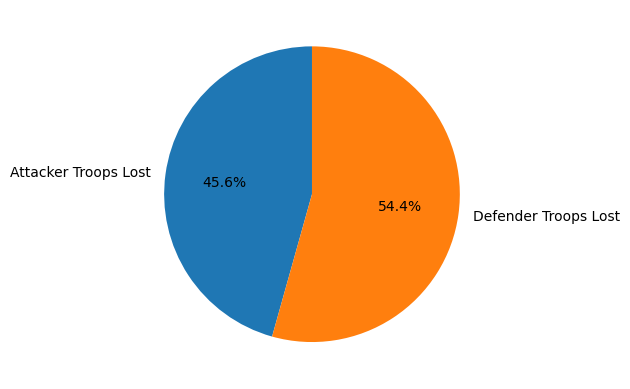

In [707]:
risk()

While this *risk* function works, it is not very good in terms of reusable code. A different format would be to give it multiple inputs, such as troops per side and update it to to end the program when one sides troops runs out. 

For this new function *risk_game()* there is a while loop to run the program when both the attacking and defending army need a minimum number of troops (3 and 2 respectively). Then this goes to the else statement that prints if a side does not have enough troops for another battle round. This ensures there is no negative values returned. 

In addition, in each instance where the While loop is True, the data is appended to a list and converted to a dataframe where it is used to plot a line chart of troops remaining per side over the number of battle rounds. 

In [708]:
def risk_game(attacker_troops=100, defender_troops=100):
    '''  
    Function where a game of risk is place for 10000 battle rounds. 


        Parameters: 
            attacker_troops (int): number of attacker troops for risk game.
            defender_troops (int): number of defender troops for risk game.


        Returns: Prints a line chart over the number of battle rounds until either side does not have enough troops for another battle round 
    '''
    data = []

    battle_rounds = 0 # to record the number of battle rounds it took to remove army counter 


    attacker_troops_lost = attacker_troops
    defender_troops_lost = defender_troops

    while defender_troops_lost >= 2 and attacker_troops_lost >= 3:
        battle_rounds += 1
        attacker_rolls = [random.randint(1,6) for i in range(3)] # writing random rolls as list comprehensions 
        attacker_rolls.sort(reverse=True)
        defender_rolls = [random.randint(1,6) for i in range(2)]
        defender_rolls.sort(reverse=True)
        if attacker_rolls[0] <= defender_rolls[0]:
            attacker_troops_lost -= 1 # removing 1 from the counter 
        else:
            defender_troops_lost -= 1
        if attacker_rolls[1] <= defender_rolls[1]:
            attacker_troops_lost -= 1
        else:
            defender_troops_lost -= 1
        data.append([battle_rounds, attacker_troops_lost, defender_troops_lost]) # adding in data for each battle round 
        
    else: # used to show another battle round cannot be ran as the min number of troops condition has not being met
        if defender_troops_lost <= 2:
            print(f'The Defending Army does not have enough troops required for another battle round')
        if attacker_troops_lost <= 3:
            print(f'The Attacking Army does not have enough troops required for another battle round')  

    # plotting troops lost over number of battle rounds
    data_df = pd.DataFrame(data, columns=['Battle_Rounds', 'Attacker_Troops_Lost', 'Defender_Troops_Lost']) # converting list to dataframe 
    plt.plot(data_df['Battle_Rounds'], data_df['Attacker_Troops_Lost'], label ='Attacking Troops')
    plt.plot(data_df['Battle_Rounds'], data_df['Defender_Troops_Lost'], label ='Defending Troops')
    plt.xlabel('Battle Rounds')
    plt.ylabel('Troops Lost')
    plt.legend()
    plt.title('Troops lost over time')        
    
    if attacker_troops_lost < 3:
        print(f'The Attacking side lost in {battle_rounds} battle rounds as they only had {attacker_troops_lost} troops remaining while the defending side had {defender_troops_lost} troops remaining')
    elif defender_troops_lost < 2:
        print(f'The Defending side lost in {battle_rounds} battle rounds as they only had {defender_troops_lost} troops remaining, while the Attacking side had {attacker_troops_lost} troops remianing')
    else:
        print(f'It a tie')

The Defending Army does not have enough troops required for another battle round
The Defending side lost in 97 battle rounds as they only had 1 troops remaining, while the Attacking side had 5 troops remianing


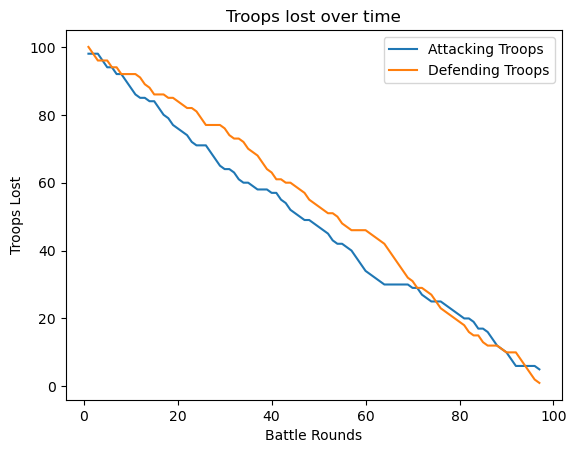

In [709]:
risk_game()

The Defending Army does not have enough troops required for another battle round
The Defending side lost in 9387 battle rounds as they only had 1 troops remaining, while the Attacking side had 1225 troops remianing


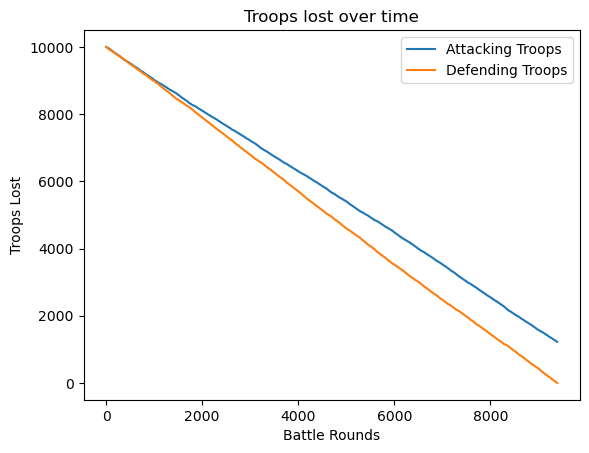

In [710]:
risk_game(10000, 10000)

The Attacking Army does not have enough troops required for another battle round
The Attacking side lost in 832 battle rounds as they only had 2 troops remaining while the defending side had 84 troops remaining


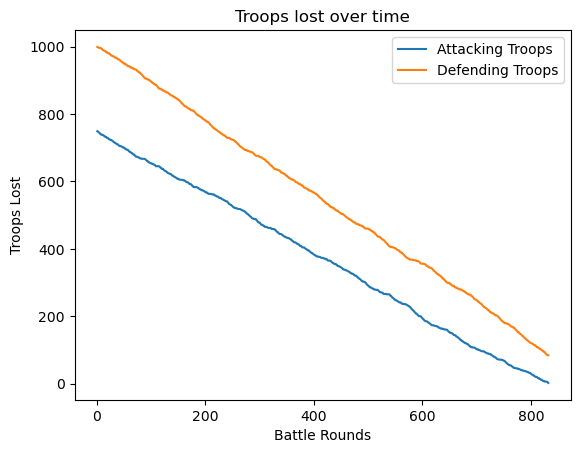

In [711]:
risk_game(750, 1000)